In [1]:
# załadowanie bibliotek

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

In [2]:
# załadowanie danych
import os 

path = r"C:\Users\piotr\Downloads\EiWD_lab_zadanie02\IHME_DAH_DATABASE_1990_2020_Y2021M09D22.CSV"
folder = r"C:\Users\piotr\Documents\Semestr 3\EiWD_zadanie_02_wykresy"

data = pd.read_csv(path, low_memory=False)
data.head()

,year,source,channel,recipient_isocode,recipient_country,gbd_location_id,wb_regioncode,wb_location_id,gbd_region,gbd_region_id,...,other_dah_20,rmh_dah_20,nch_dah_20,ncd_dah_20,hiv_dah_20,mal_dah_20,tb_dah_20,swap_hss_total_dah_20,oid_dah_20,unalloc_dah_20
0,1990,Australia,BIL_AUS,AGO,Angola,168,SSA,242,"Sub-Saharan Africa, Central",167.0,...,0,5,0,0,7,3,0,0,0,-
1,1990,Australia,BIL_AUS,BDI,Burundi,175,SSA,242,"Sub-Saharan Africa, Eastern",174.0,...,0,6,0,0,5,1,0,0,0,0
2,1990,Australia,BIL_AUS,BEN,Benin,200,SSA,242,"Sub-Saharan Africa, Western",199.0,...,0,6,0,0,5,2,0,0,0,0
3,1990,Australia,BIL_AUS,BFA,Burkina Faso,201,SSA,242,"Sub-Saharan Africa, Western",199.0,...,0,5,0,0,7,2,0,0,0,0
4,1990,Australia,BIL_AUS,BWA,Botswana,193,SSA,242,"Sub-Saharan Africa, Southern",192.0,...,0,1,0,0,23,-,0,0,0,-


In [3]:
num_data = data.select_dtypes(include='number')

num_data.describe()

,year,gbd_location_id,wb_location_id,gbd_region_id,gbd_superregion_id,elim_ch,prelim_est
count,384306.000000,384306.000000,384306.000000,383993.000000,383993.000000,384306.000000,384306.000000
mean,2008.127521,1765.935533,2240.752439,1745.812671,1733.144388,0.252052,0.014358
std,6.945191,8325.915434,9204.906147,8328.525983,8330.949734,0.434191,0.118963
min,1990.000000,1.000000,239.000000,1.000000,1.000000,0.000000,0.000000
25%,2004.000000,110.000000,241.000000,96.000000,64.000000,0.000000,0.000000
50%,2009.000000,169.000000,242.000000,159.000000,158.000000,0.000000,0.000000
75%,2014.000000,200.000000,242.000000,192.000000,166.000000,1.000000,0.000000
max,2020.000000,44598.000000,44621.000000,44598.000000,44598.000000,1.000000,1.000000


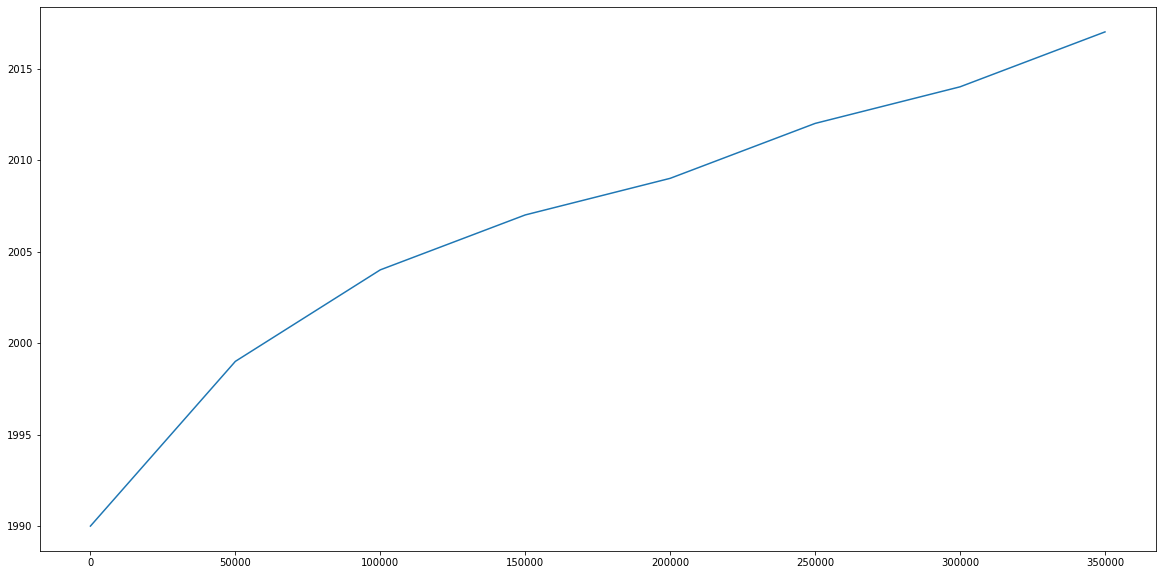

In [4]:
# wykres liniowy

years = data['year'][::50_000]

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(years)
plt.savefig(os.path.join(folder, 'wykres1.svg'), dpi=400, bbox_inches='tight')

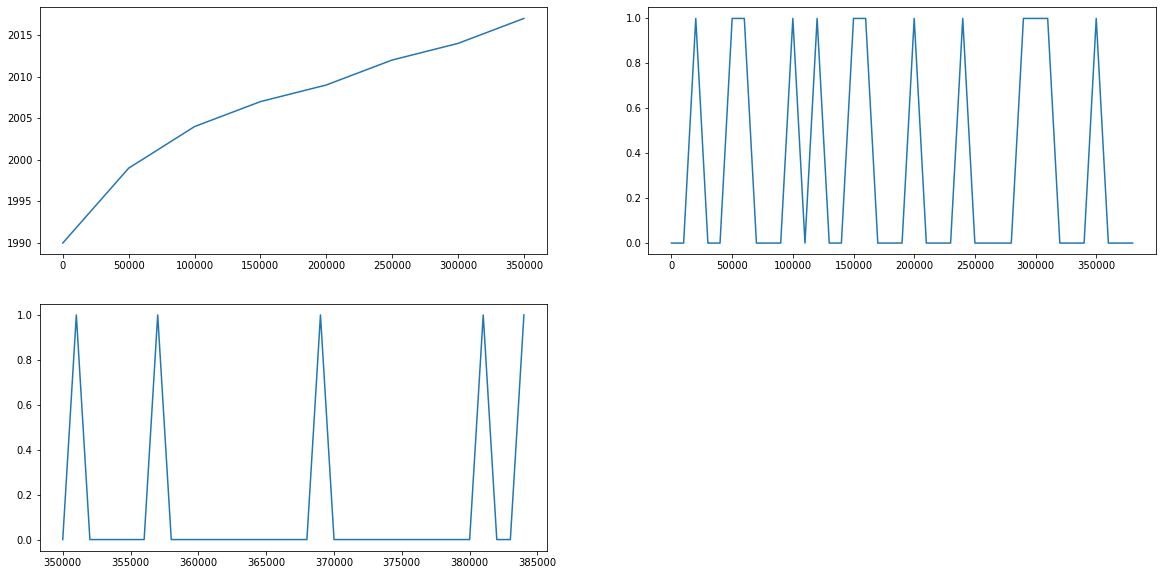

In [5]:
# kilka podwykresów

fig = plt.figure()
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)

elim_ch = data['elim_ch'][::10_000]
prelim_est = data['prelim_est'][350_000::1_000]

ax0.plot(years)
ax1.plot(elim_ch)
ax2.plot(prelim_est)

plt.savefig(os.path.join(folder, 'wykres2.svg'), dpi=400, bbox_inches='tight')

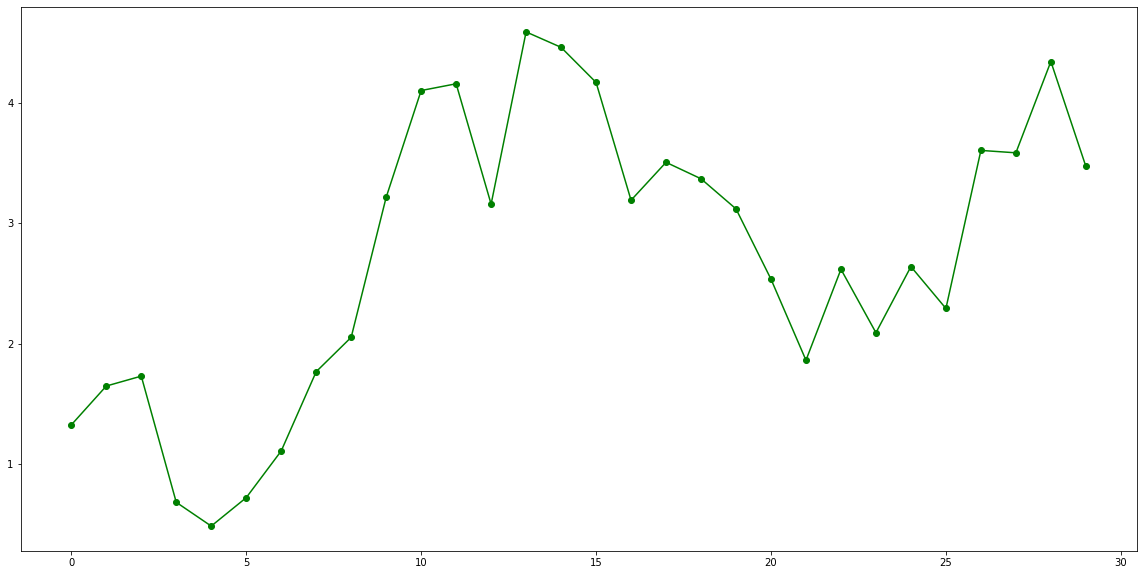

In [6]:
# wykres punktowy ze zdefiniowanymi kolorami, stylem znaczników i linii

from numpy.random import randn
plt.plot(randn(30).cumsum(), 'go-')
plt.savefig(os.path.join(folder, 'wykres3.svg'), dpi=400, bbox_inches='tight')

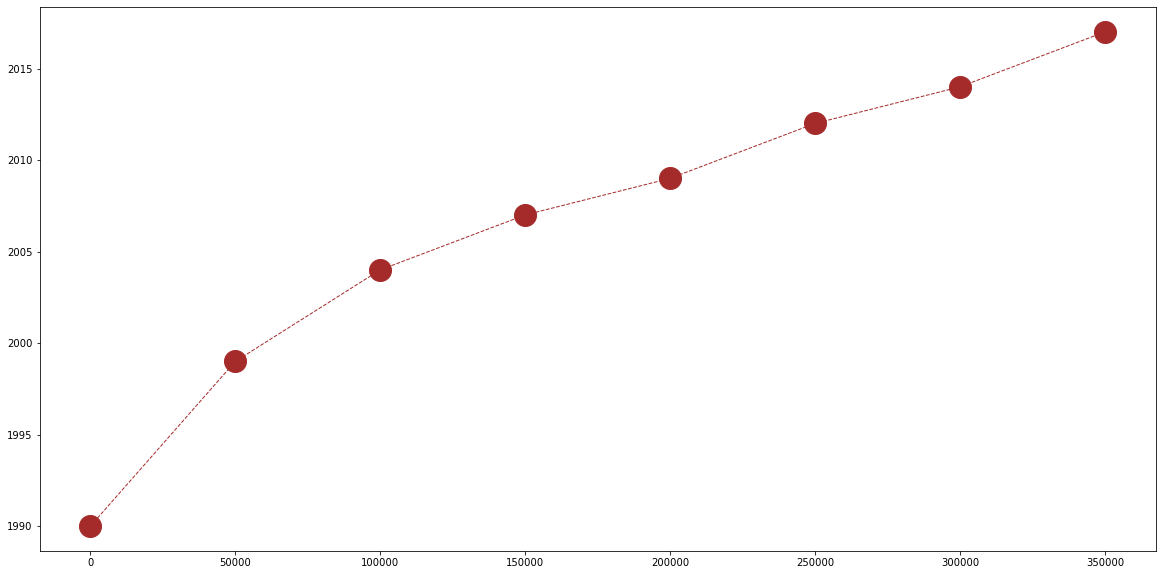

In [7]:
plt.plot(years, color='brown', marker='o', markersize=22, linestyle='--', linewidth=1)
plt.savefig(os.path.join(folder, 'wykres4.svg'), dpi=400, bbox_inches='tight')

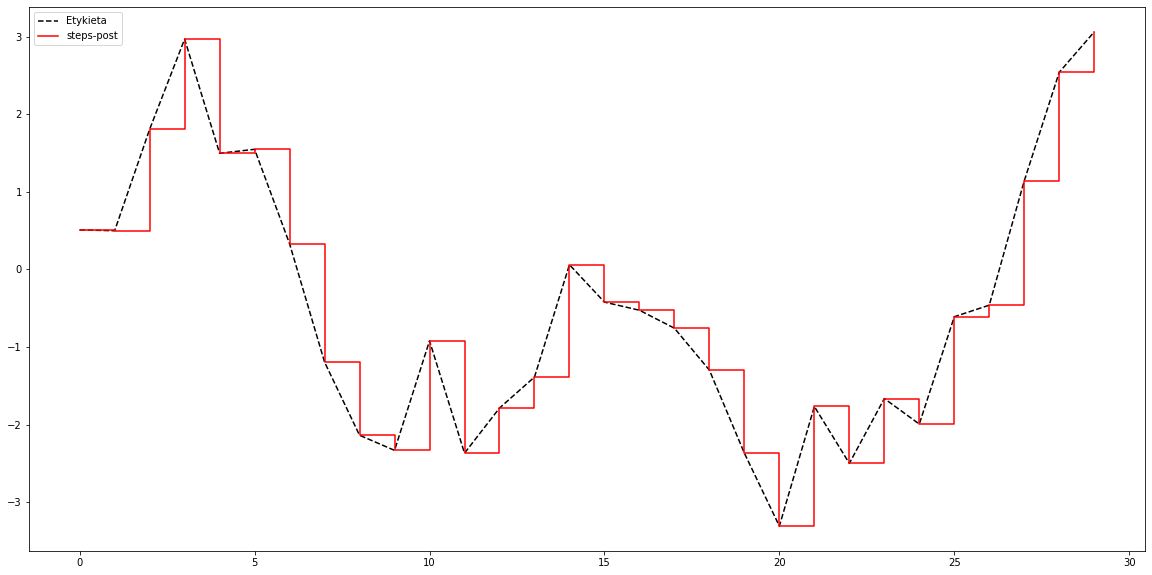

In [8]:
# wykres interpolacji liniowej

data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Etykieta')
plt.plot(data, 'r-',  label="steps-post", drawstyle="steps-post")
plt.legend(loc='best')

# normalizacja
# years_normal = years.div(years.sum())
# elim_ch_normal = elim_ch.div(elim_ch.sum())
# prelim_est_normal = prelim_est.div(prelim_est.sum())

# plt.plot(years_normal, 'k--', label='years', drawstyle='steps-pre')
# plt.plot(elim_ch_normal, 'g.', label='elim ch', drawstyle='steps-mid')
# plt.plot(prelim_est_normal, 'r-', label='elim ch', drawstyle='steps-post')
# plt.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres5.png'), dpi=400, bbox_inches='tight')

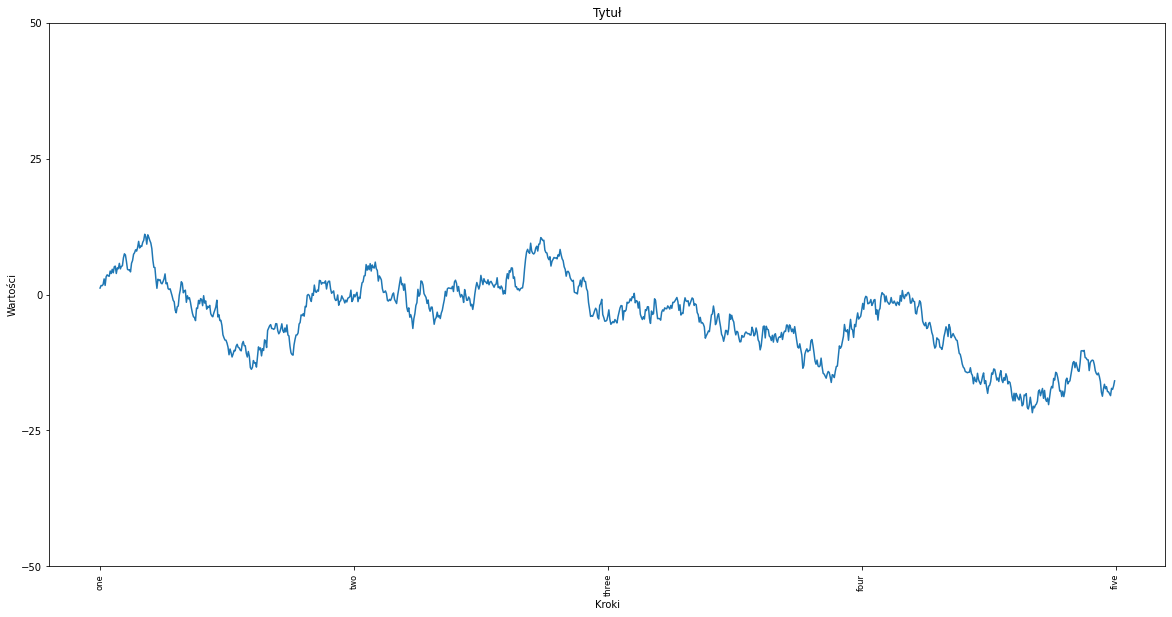

In [9]:
# dodanie etykiet na osi

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_yticks([-50, -25, 0, 25, 50])

ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=90, fontsize='small')

# dodanie właściwości wykresu słownikiem

props = {
    'title': "Tytuł",
    'xlabel': "Kroki",
    'ylabel': "Wartości"
}
ax.set(**props)

plt.savefig(os.path.join(folder, 'wykres6.svg'), dpi=400, bbox_inches='tight')

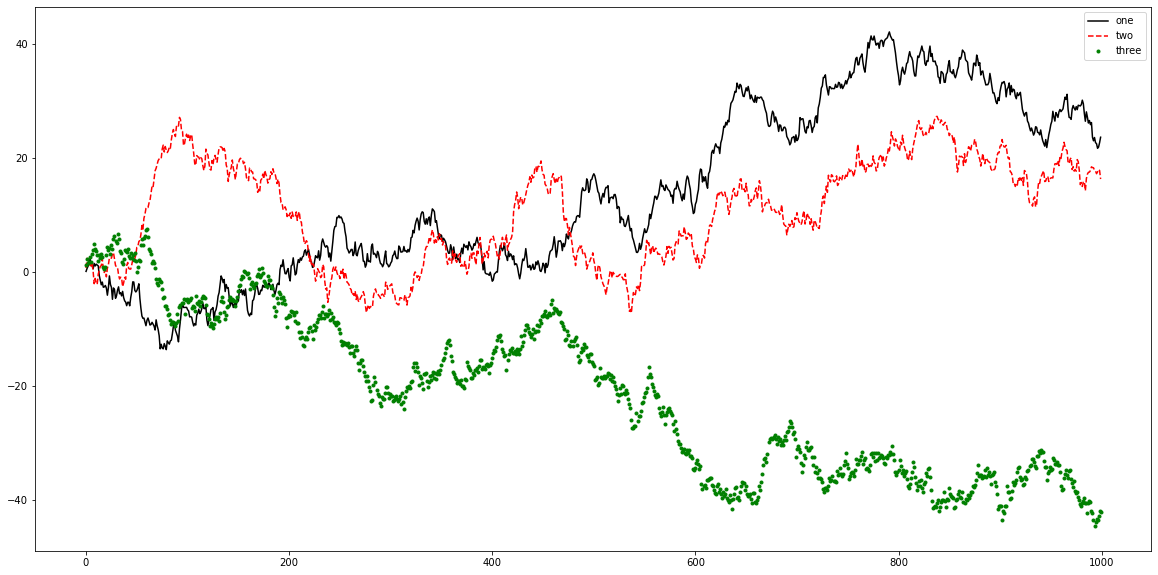

In [10]:
fig = plt.figure(); 
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres7.svg'), dpi=400, bbox_inches='tight')

In [11]:
# zapis wykresu do pliku

path = r"C:\Users\piotr\Downloads\wykres01.svg"
plt.savefig(path, dpi=400, bbox_inches='tight')

<Figure size 1440x720 with 0 Axes>

In [12]:
x = np.arange(0, 300_00*50_000, 50_000)

print(len(x))

print(x)

30000
[         0      50000     100000 ... 1499850000 1499900000 1499950000]


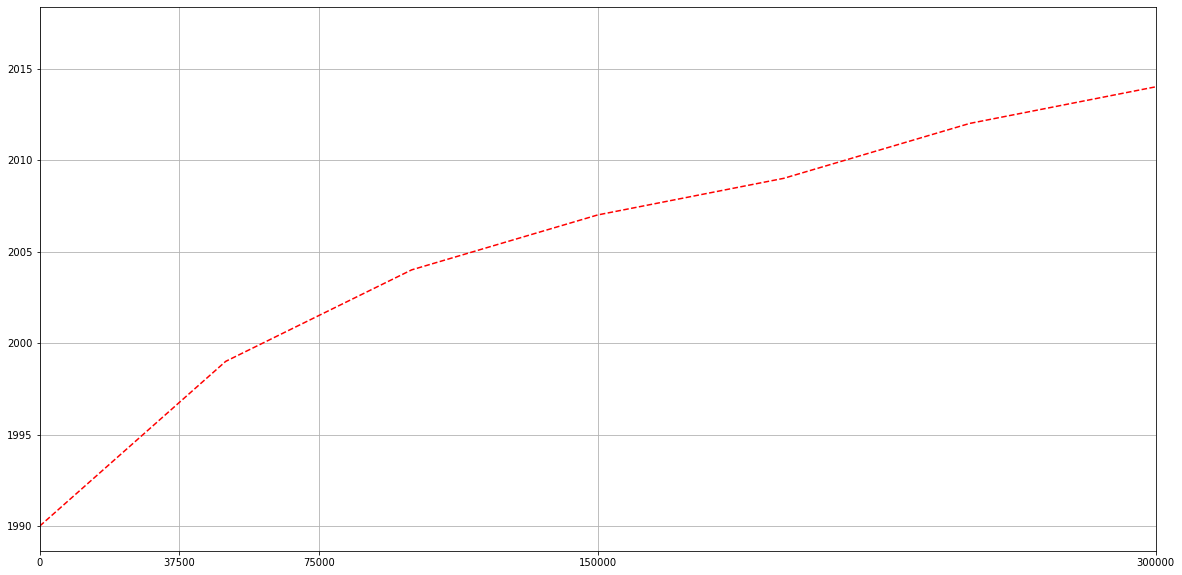

In [13]:
import numpy as np
import pandas as pd

xmax = 300_000

s = pd.Series(years, index=np.arange(0, xmax*50_000, 50_000))
s.plot(kind='line', logy=False, xticks=[0, xmax/8, xmax/4, xmax/2, xmax], xlim=[0, xmax], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

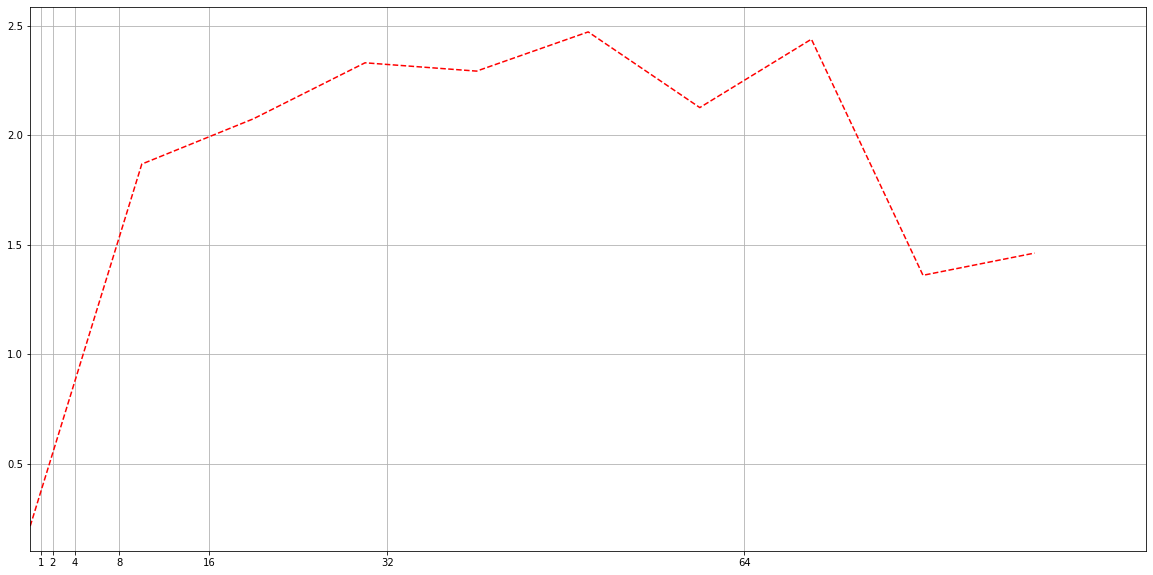

In [14]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(kind='line', logy=False, xticks=[1, 2, 4, 8, 16, 32, 64, 128], xlim=[0, 100], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

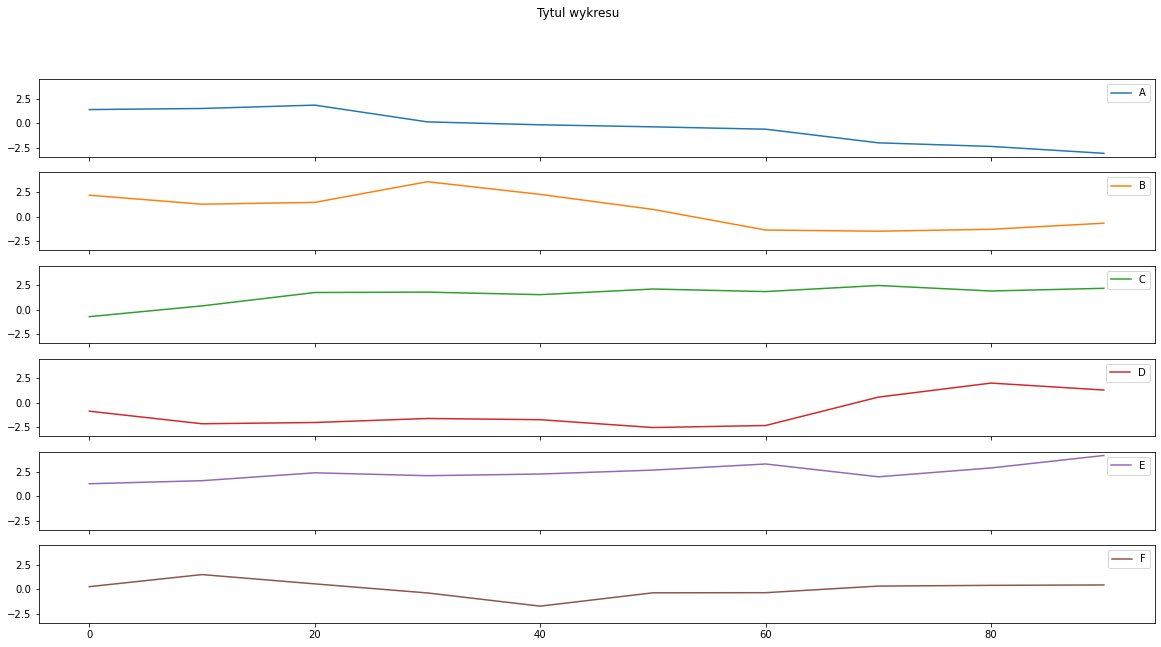

In [15]:
df = pd.DataFrame(np.random.randn(10, 6).cumsum(0), columns=['A', 'B', 'C', 'D', 'E', 'F'], index=np.arange(0, 100, 10))
df.plot(subplots=True, sharex=True, sharey=True, title='Tytul wykresu', sort_columns=True)

#df = num_data
#df.plot(subplots=True, sharex=True, sharey=True, title='Wykresy wartości liczbowych', sort_columns=True)

plt.savefig(os.path.join(folder, 'wykres9.png'), dpi=400, bbox_inches='tight')

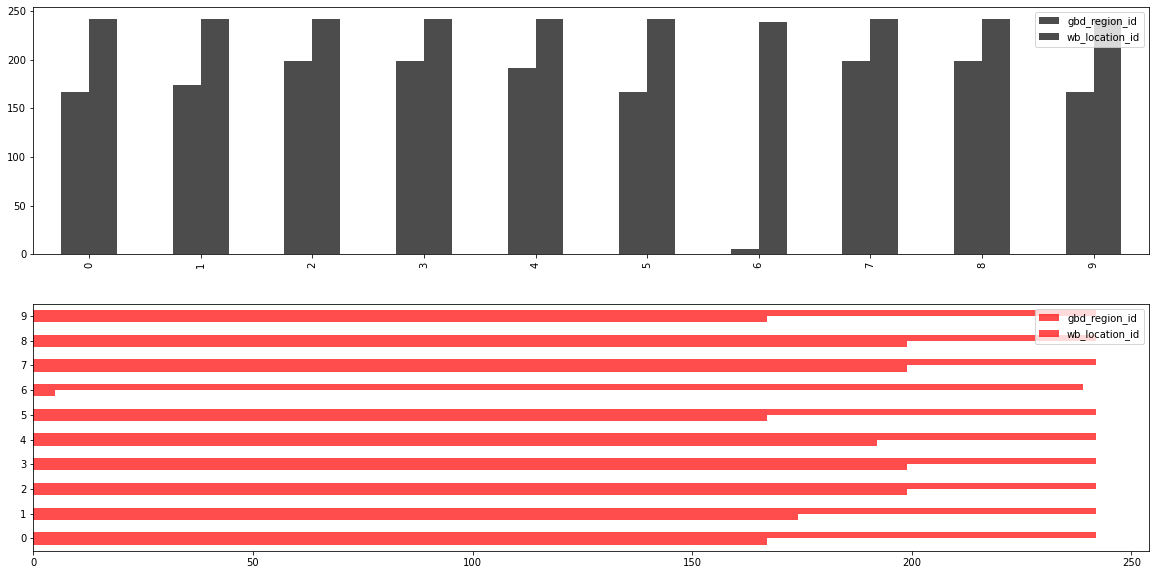

In [16]:
#data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data = pd.DataFrame(num_data[['wb_location_id', 'gbd_region_id']][:10], columns=['gbd_region_id', 'wb_location_id'])

fig, axes = plt.subplots(2, 1)

data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='r', alpha=0.7)

plt.savefig(os.path.join(folder, 'wykres10.png'), dpi=400, bbox_inches='tight')

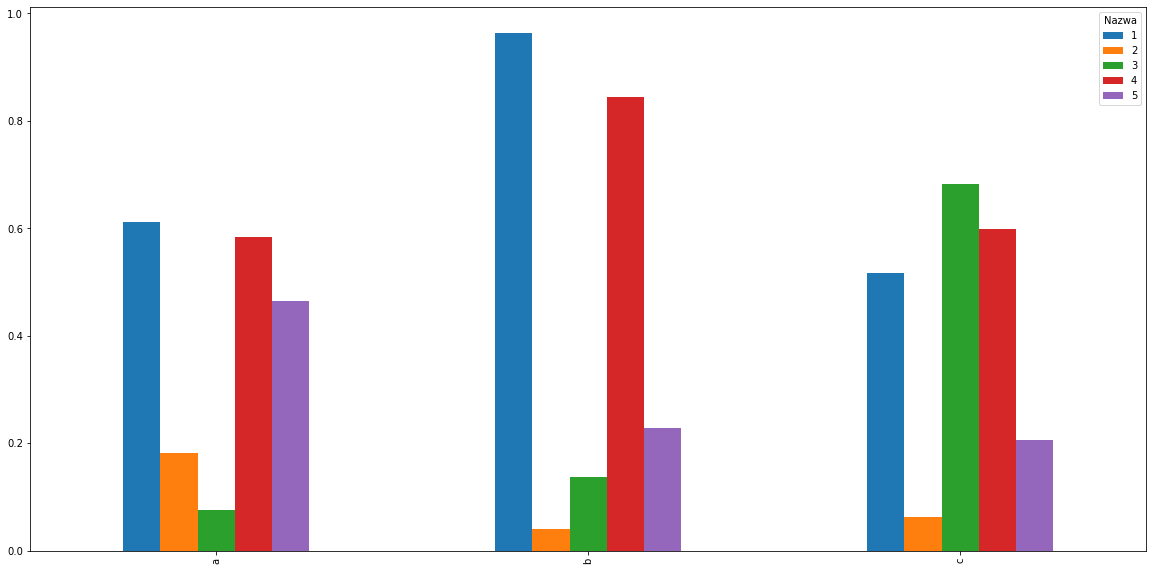

In [17]:
data = np.random.rand(3, 5)

df = pd.DataFrame(data, index=['a', 'b', 'c'], columns=pd.Index(['1', '2', '3', '4', '5'], name='Nazwa'))
df.plot.bar()

plt.savefig(os.path.join(folder, 'wykres11.png'), dpi=400, bbox_inches='tight')

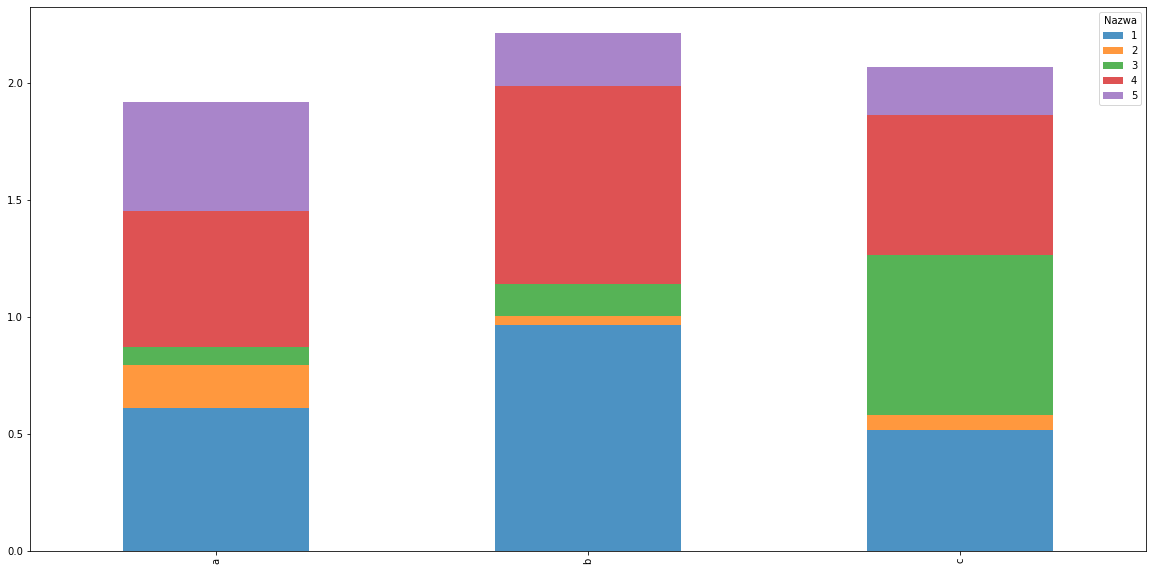

In [18]:
df.plot.bar(stacked=True, alpha=0.8)

plt.savefig(os.path.join(folder, 'wykres12.png'), dpi=400, bbox_inches='tight')

In [19]:
n = 1_000

total_bill = [x * 100 for x in np.random.rand(n)]
tip = [x * (np.random.rand(1)[0]/10) for x in total_bill]
sex = np.random.choice(['Female', 'Male'], n)
smoker = np.random.choice(['yes', 'no'], n, p=[0.3, 0.7])
day = np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], n)
size = np.random.choice([np.arange(1, 7)][0], n)

tips = pd.DataFrame(
    { 
        'total_bill': total_bill, 
        'tip': tip, 
        'sex': sex, 
        'smoke': smoker,
        'day': day,
        'size': size
    })

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,29,21,28,18,24,27
Mon,26,22,23,20,18,35
Sat,23,25,35,18,24,19
Sun,16,21,21,20,22,26
Thu,26,23,27,36,13,24
Tue,19,23,22,25,24,33
Wed,25,17,22,22,33,25


In [20]:
# normalizacja wartości

party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.197279,0.142857,0.190476,0.122449,0.163265,0.183673
Mon,0.180556,0.152778,0.159722,0.138889,0.125000,0.243056
Sat,0.159722,0.173611,0.243056,0.125000,0.166667,0.131944
Sun,0.126984,0.166667,0.166667,0.158730,0.174603,0.206349
Thu,0.174497,0.154362,0.181208,0.241611,0.087248,0.161074
Tue,0.130137,0.157534,0.150685,0.171233,0.164384,0.226027
Wed,0.173611,0.118056,0.152778,0.152778,0.229167,0.173611


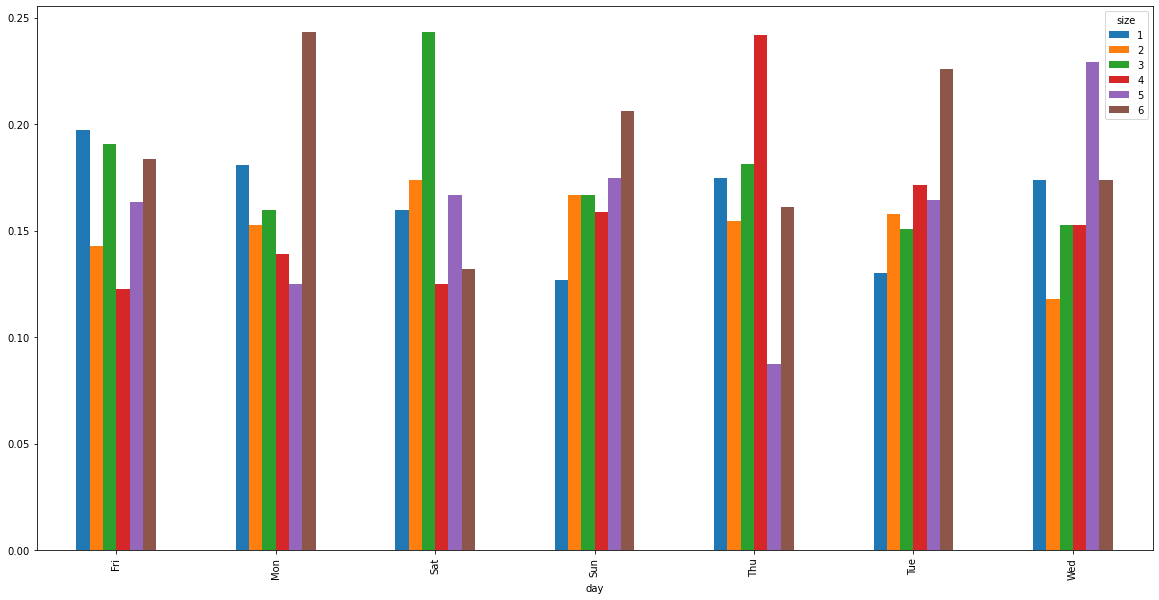

In [21]:
party_pcts.plot.bar()

plt.savefig(os.path.join(folder, 'wykres13.svg'), dpi=400, bbox_inches='tight')

In [22]:
import seaborn as sns

In [23]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoke,day,size,tip_pct
0,47.471453,3.387584,Female,yes,Sat,5,0.076844
1,20.884283,1.054613,Female,no,Sat,5,0.053184
2,72.251788,3.290142,Female,yes,Thu,4,0.047710
3,90.229426,8.299866,Female,yes,Wed,5,0.101305
4,45.037490,1.794138,Male,no,Thu,3,0.041489
...,...,...,...,...,...,...,...
995,1.411061,0.048835,Male,no,Sat,5,0.035850
996,2.541856,0.187627,Female,no,Mon,6,0.079698
997,68.370616,1.556100,Male,no,Fri,3,0.023290
998,39.703214,3.736314,Male,no,Sun,5,0.103882


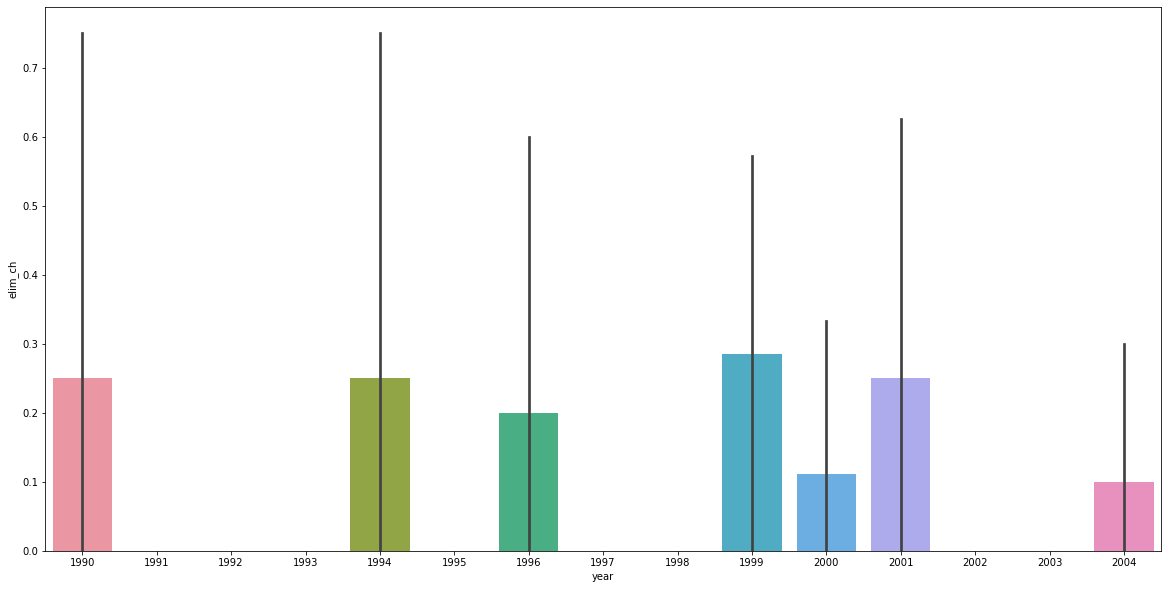

In [24]:
#sns.barplot(x='tip_pct', y='day', data=tips, orient='h', hue='sex')
import seaborn as sns

max = 100_000
per = 1_000
sns.barplot(y=num_data.elim_ch[:max:per], x = num_data.year[:max:per])

plt.savefig(os.path.join(folder, 'wykres14.png'), dpi=400, bbox_inches='tight')

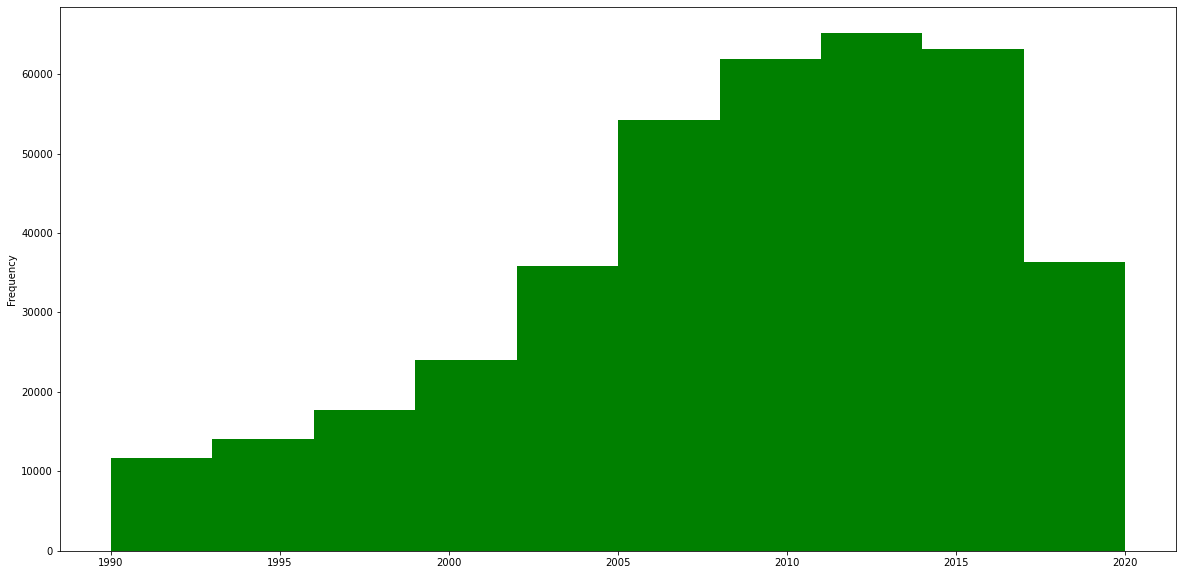

In [25]:
# histogram
#tips['tip_pct'].plot.hist(bins=50)
num_data['year'].plot.hist(bins=10, color='green')

plt.savefig(os.path.join(folder, 'wykres15.png'), dpi=400, bbox_inches='tight')

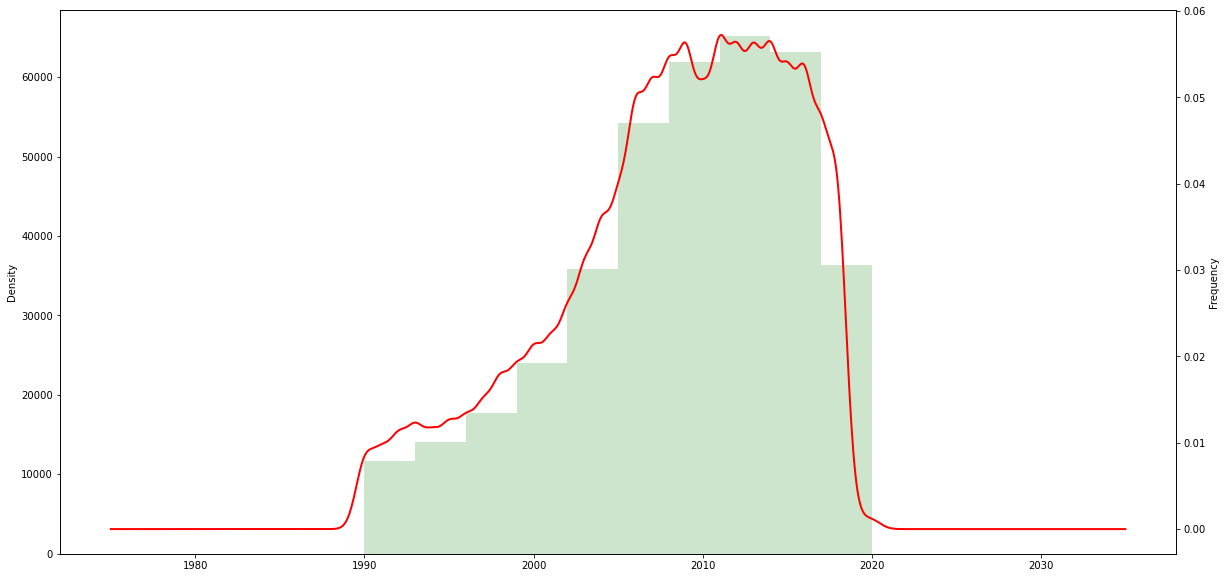

In [26]:
# wykres gęstości

#tips['tip_pct'].plot.kde()
num_data['year'].plot.hist(bins=10, color='green', alpha=0.2)
ax = num_data['year'].plot.kde(color='red', linewidth=2.0, secondary_y=True)
ax.set_ylabel("Frequency", fontsize=10)

plt.savefig(os.path.join(folder, 'wykres16.png'), dpi=400, bbox_inches='tight')

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


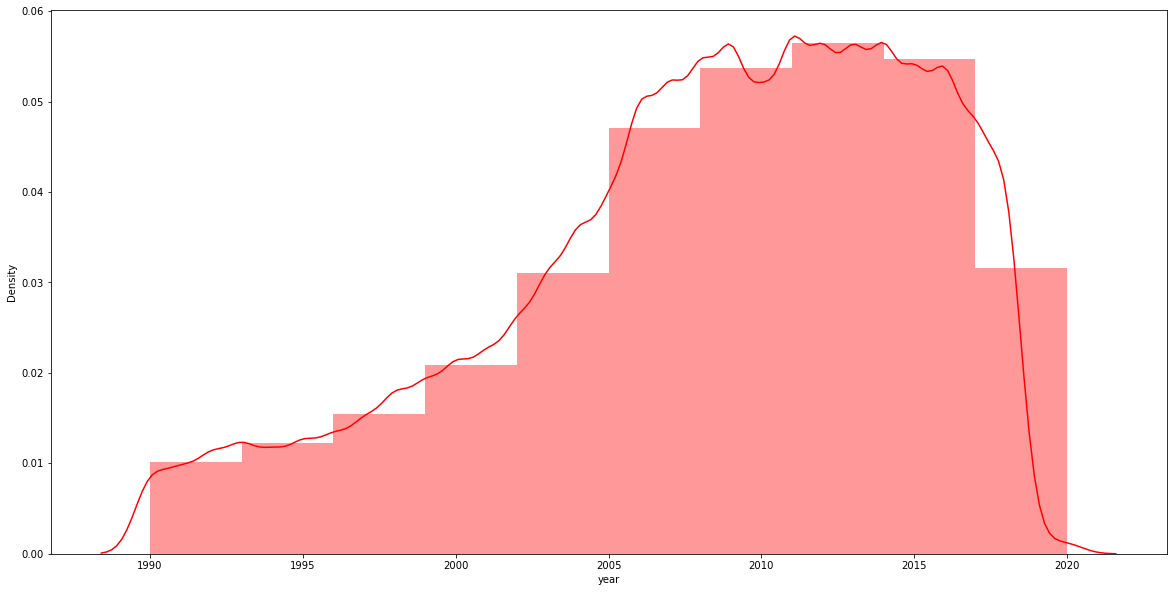

In [27]:
# histogram i wykres gęstości na jednym wykresie
#comp1 = np.random.normal(0, 1, size=200)
#comp2 = np.random.normal(10, 2, size=200)

#vals = pd.Series(np.concatenate([comp1, comp2]))

#sns.distplot(vals, bins=100, color='r')
sns.distplot(num_data['year'], bins=10, color='r')

plt.savefig(os.path.join(folder, 'wykres17.png'), dpi=400, bbox_inches='tight')

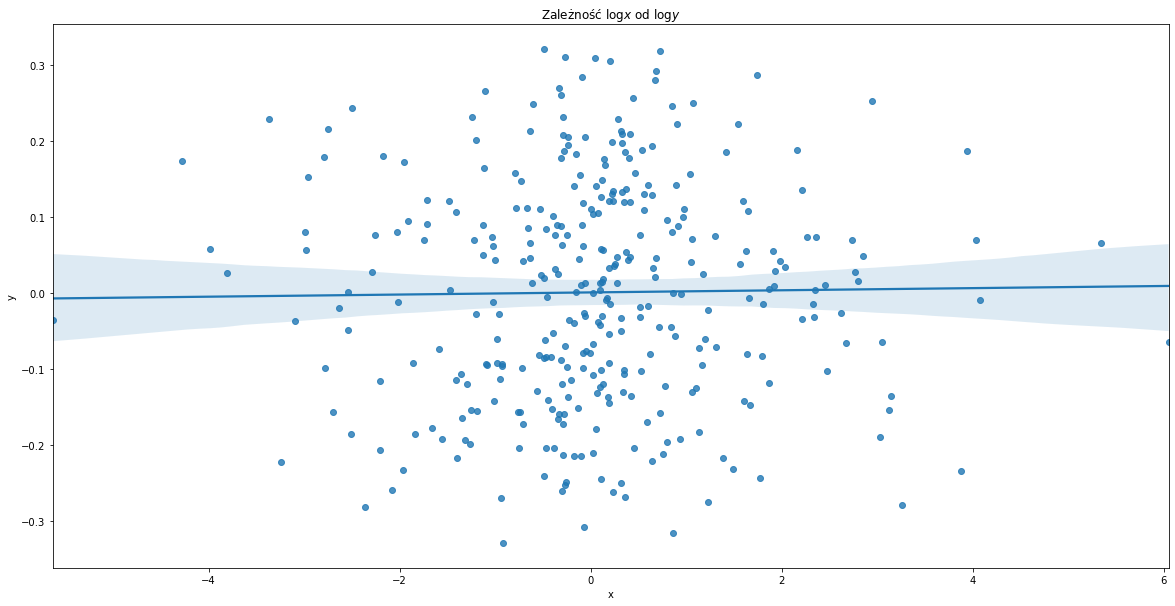

In [28]:
# wykres regresji liniowej

# losowe dane
n = 1_000
data = pd.DataFrame({
    'x': np.random.rand(n)*5-2,
    'y': np.random.rand(n)*2+5, 
    'z': np.random.rand(n)
})
# różnica logarytmów
data = np.log(data).diff()

sns.regplot(x='x', y='y', data=data)
plt.title('Zależność $\log{x}$ od $\log{y}$')

#sns.regplot(x='elim_ch', y='prelim_est', data=num_data)
#plt.title('Zależność $\log$ {} od $\log$ {}'.format('m1', 'unemp'))

plt.savefig(os.path.join(folder, 'wykres18.png'), dpi=400, bbox_inches='tight')

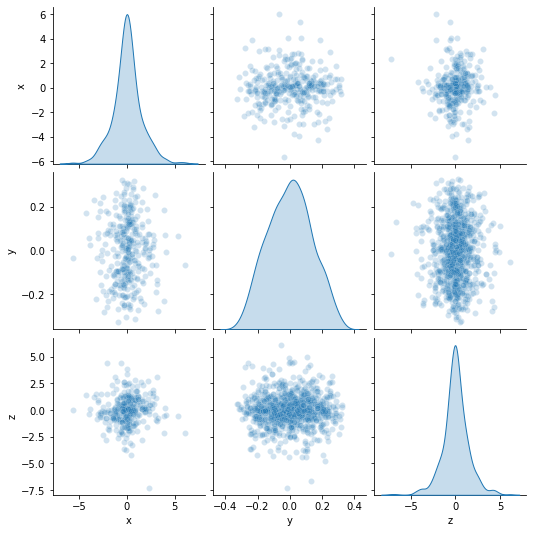

In [29]:
# wszystkie wykresy rozrzutu

#sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.2})

plt.savefig(os.path.join(folder, 'wykres19.png'), dpi=400, bbox_inches='tight')

In [30]:
# kilka wykresów słupkowych obok siebie (tzw. faset)

path = r"C:\Users\piotr\Downloads\EiWD_lab_zadanie02\IHME_DAH_DATABASE_1990_2020_Y2021M09D22.CSV"

data = pd.read_csv(path, low_memory=False)

#print(data.source.drop_duplicates())
#print(data[data['prelim_est'] == 1].source.drop_duplicates()) # Australia, Austra, Belgium, Canada, Denmark, Finland, Germany, Greece...
#print(data[data['prelim_est'] == 1].year.drop_duplicates()) # 1990, 1991, 2017, 2018, 2019, 2020

#print(data.year.drop_duplicates())
#print(data[data['prelim_est'] == 0].source.drop_duplicates()) # Australia, Austria, Belgium, Canada, China, Denmark, Finland, France, Germany, Greece...
#print(data[data['prelim_est'] == 0].year.drop_duplicates()) # 1990-2020

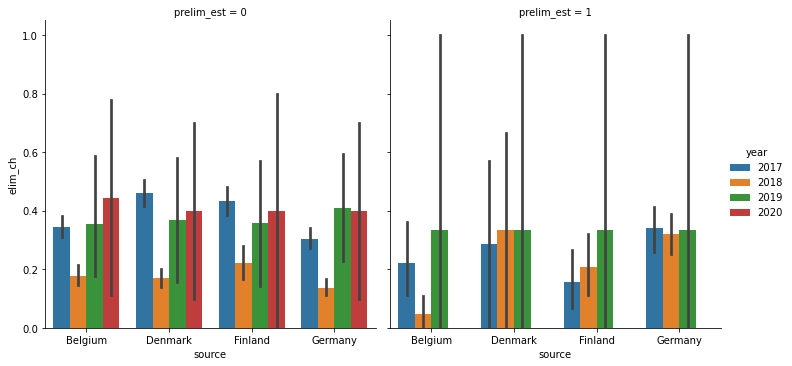

In [76]:
#sns.catplot(x='day', y='tip_pct', hue='sex', col='smoke', kind='bar', data=tips[tips.tip_pct < 1])

data = data[(data.year.isin([2017, 2018, 2019, 2020]) & data.source.isin(['Austrialia', 'Belgium', 'Denmark', 'Finland', 'Germany']))]

sns.catplot(x='source', y='elim_ch', hue='year', col='prelim_est', kind='bar', data=data)

plt.savefig(os.path.join(folder, 'wykres20.png'), dpi=400, bbox_inches='tight')

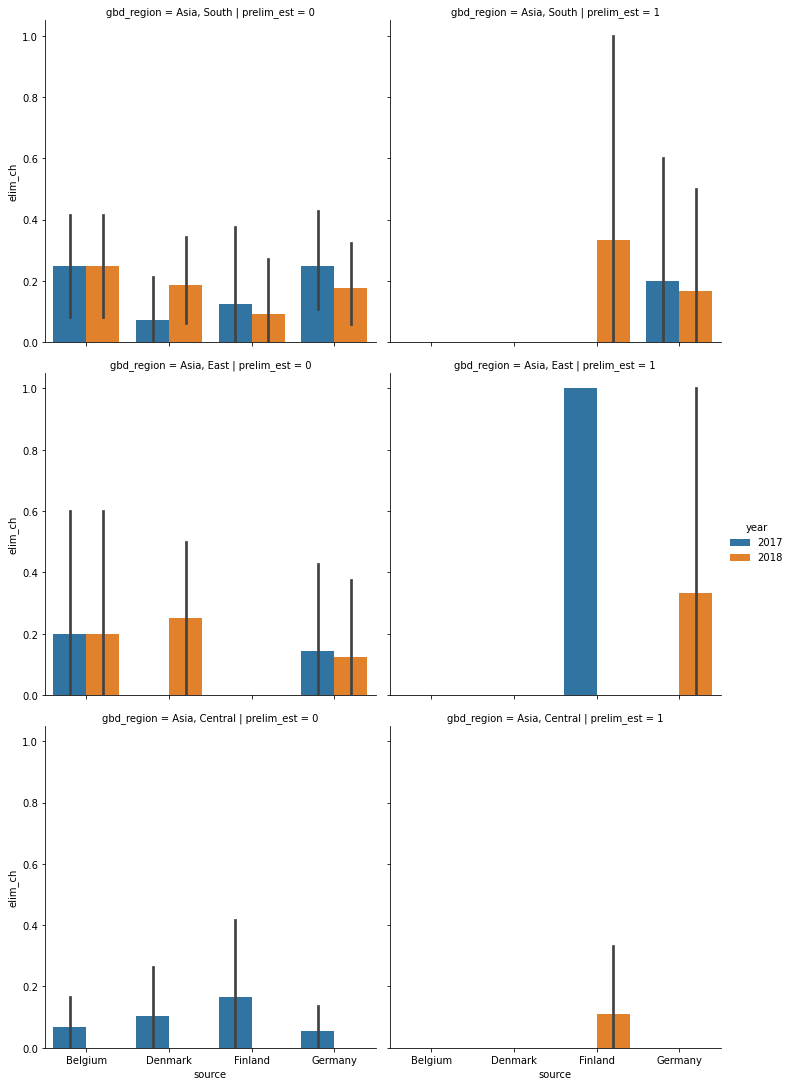

In [46]:
# łączenie warunków wyświetlania faset

#sns.catplot(x='day', y='tip_pct', row='sex', col='smoke', kind='bar', data=tips[tips.tip_pct < 1])
sns.catplot(x='source', y='elim_ch', hue='year', row='gbd_region', col='prelim_est', kind='bar', data=data[data.gbd_region.isin(['Asia, South', 'Asia, East', 'Asia, Central'])])

plt.savefig(os.path.join(folder, 'wykres21.png'), dpi=400, bbox_inches='tight')

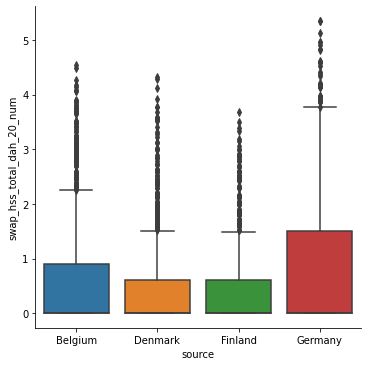

In [125]:
# wykresy pudełkowe

#sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

import math

data['swap_hss_total_dah_20_num'] = data.swap_hss_total_dah_20.apply(lambda x: 0 if x=='-' else math.log(abs(int(x)+1),10))
#sns.catplot(x='source', y='swap_hss_total_dah_20_num', kind='box', data=data[data.gbd_region.isin(['Asia, South', 'Asia, East', 'Asia, Central'])])
sns.catplot(x='source', y='swap_hss_total_dah_20_num', kind='box', data=data)

plt.savefig(os.path.join(folder, 'wykres22.png'), dpi=400, bbox_inches='tight')